# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [7]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [8]:
# Use pd.read_excel() to read an Excel file
df = pd.read_excel(r"/home/jovyan/work/Online Retail.xlsx")


In [9]:
# To display the top 5 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# To display the bottom 5 rows
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
df = df.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)
df.head(5)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [13]:
df.shape

(541909, 5)

In [14]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (6183, 5)


In [15]:
df.count()      # Used to count the number of rows

Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
Country        541909
dtype: int64

In [16]:
df = df.drop_duplicates()
df.head(5)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [17]:
df.count()

Description    534356
Quantity       535726
InvoiceDate    535726
UnitPrice      535726
Country        535726
dtype: int64

In [18]:
print(df.isnull().sum())

Description    1370
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64


In [19]:
df = df.dropna()    # Dropping the missing values.
df.count()

Description    534356
Quantity       534356
InvoiceDate    534356
UnitPrice      534356
Country        534356
dtype: int64

In [20]:
print(df.isnull().sum())   # After dropping the values

Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64


In [21]:
# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract day, month, year, time, and day of the week
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Time'] = df['InvoiceDate'].dt.time  # This will extract the time (HH:MM:SS)
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()  # Extract day of the week (e.g., Monday, Tuesday)

# Display the new columns
print(df[['Day', 'Month', 'Year', 'Time', 'DayOfWeek']].head())

   Day  Month  Year      Time  DayOfWeek
0    1     12  2010  08:26:00  Wednesday
1    1     12  2010  08:26:00  Wednesday
2    1     12  2010  08:26:00  Wednesday
3    1     12  2010  08:26:00  Wednesday
4    1     12  2010  08:26:00  Wednesday


In [40]:
print(df.head(5))
print(df.tail(5))

                           Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice         Country  Day  Month  Year      Time  DayOfWeek  
0       2.55  United Kingdom    1     12  2010  08:26:00  Wednesday  
1       3.39  United Kingdom    1     12  2010  08:26:00  Wednesday  
2       2.75  United Kingdom    1     12  2010  08:26:00  Wednesday  
3       3.39  United Kingdom    1     12  2010  08:26:00  Wednesday  
4       3.39  United Kingdom    1     12  2010  08:26:00  Wednesday  
                            Description  Quantity         InvoiceDate  \
541904      PACK OF 20 SPACEBOY NAPKINS        12 2011-12-09 12:50:00   
5

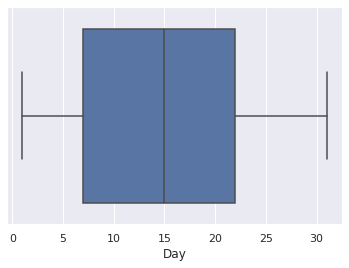

In [23]:
sns.boxplot(x=df['Day'])

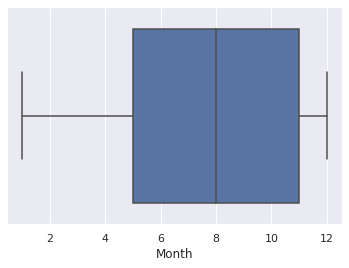

In [24]:
sns.boxplot(x=df['Month'])

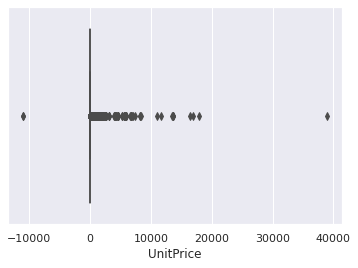

In [25]:
sns.boxplot(x=df['UnitPrice'])

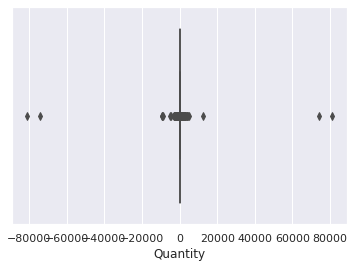

In [26]:
sns.boxplot(x=df['Quantity'])

In [ ]:
from scipy import stats
import numpy as np

# Assuming boston_df is your DataFrame
z = np.abs(stats.zscore(pd.read_excel(r"/home/jovyan/work/Online Retail.xlsx")))

# Print Z-scores
print(z)

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity      9.00
UnitPrice     2.88
Day          15.00
Month         6.00
Year          0.00
dtype: float64


In [62]:
# Select numerical columns only for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers for numerical columns only
df_filtered = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the filtered dataframe
df_filtered.shape



(404023, 10)

In [64]:
# Make sure to use parentheses to properly group comparisons
outliers = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))

# Print the result
print(outliers)

        Quantity  UnitPrice    Day  Month   Year
0          False      False  False  False   True
1          False      False  False  False   True
2          False      False  False  False   True
3          False      False  False  False   True
4          False      False  False  False   True
...          ...        ...    ...    ...    ...
541904     False      False  False  False  False
541905     False      False  False  False  False
541906     False      False  False  False  False
541907     False      False  False  False  False
541908     False      False  False  False  False

[534356 rows x 5 columns]


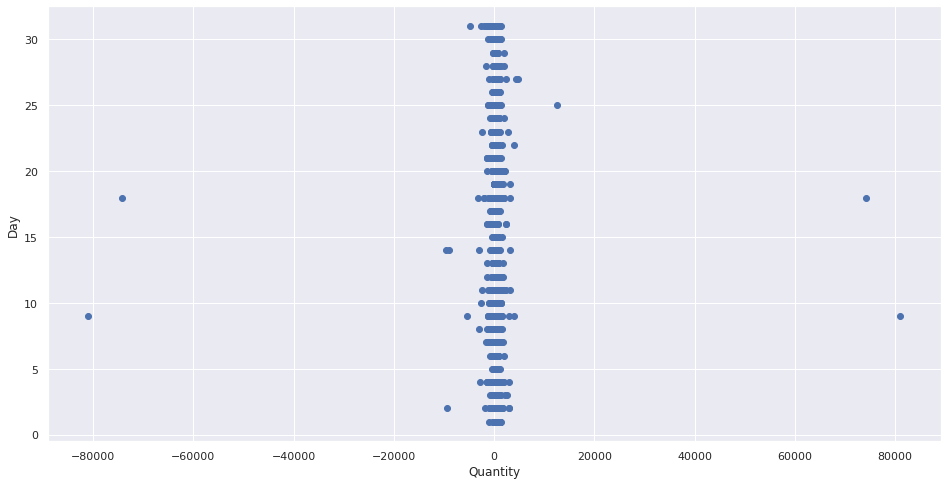

In [29]:
# Adjust the figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Scatter plot using two columns from your dataset, e.g., 'InvoiceDate' and 'Quantity'
# Replace 'Column1' and 'Column2' with the actual column names from your dataset
ax.scatter(df['Quantity'], df['Day'])  # You can replace these with any relevant columns

# Setting up labels for x and y axes
ax.set_xlabel('Quantity')  # Label for the X-axis, replace with the appropriate description
ax.set_ylabel('Day')  # Label for the Y-axis, replace with the appropriate description

# Display the plot
plt.show()

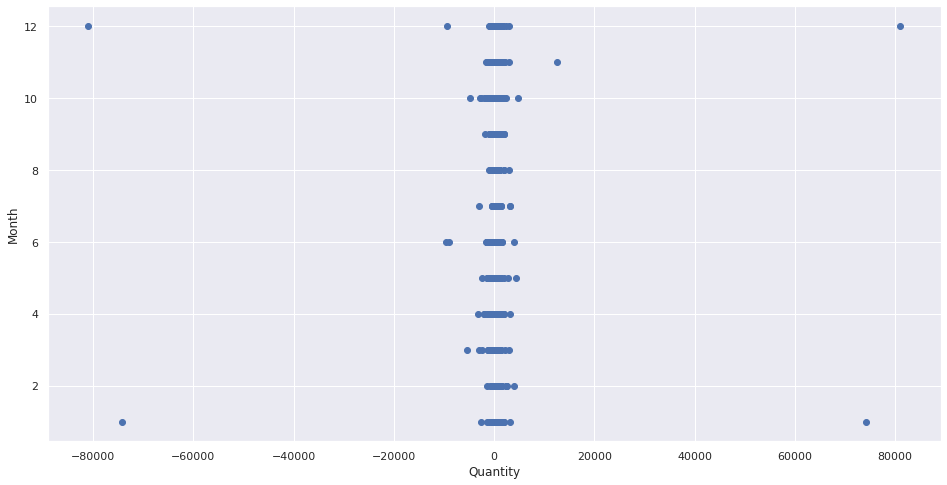

In [30]:
# Adjust the figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Scatter plot using two columns from your dataset, e.g., 'InvoiceDate' and 'Quantity'
# Replace 'Column1' and 'Column2' with the actual column names from your dataset
ax.scatter(df['Quantity'], df['Month'])  # You can replace these with any relevant columns

# Setting up labels for x and y axes
ax.set_xlabel('Quantity')  # Label for the X-axis, replace with the appropriate description
ax.set_ylabel('Month')  # Label for the Y-axis, replace with the appropriate description

# Display the plot
plt.show()

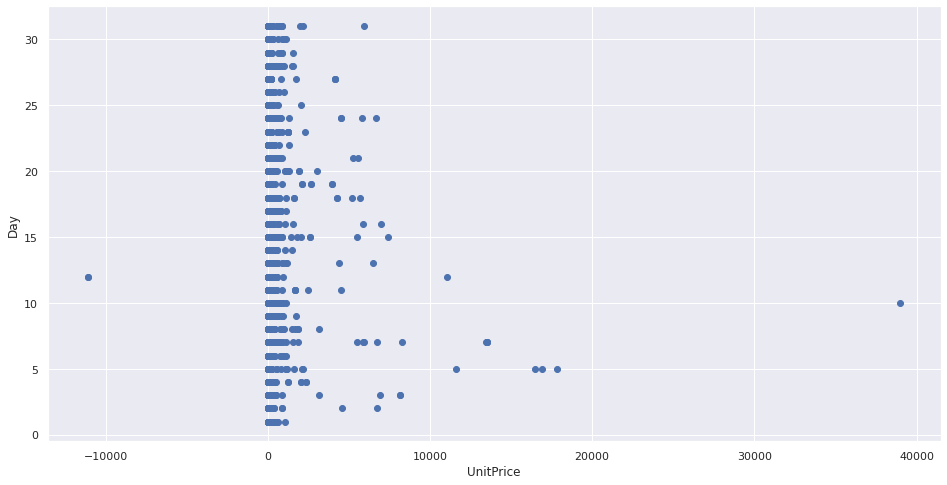

In [31]:
# Adjust the figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Scatter plot using two columns from your dataset, e.g., 'InvoiceDate' and 'Quantity'
# Replace 'Column1' and 'Column2' with the actual column names from your dataset
ax.scatter(df['UnitPrice'], df['Day'])  # You can replace these with any relevant columns

# Setting up labels for x and y axes
ax.set_xlabel('UnitPrice')  # Label for the X-axis, replace with the appropriate description
ax.set_ylabel('Day')  # Label for the Y-axis, replace with the appropriate description

# Display the plot
plt.show()

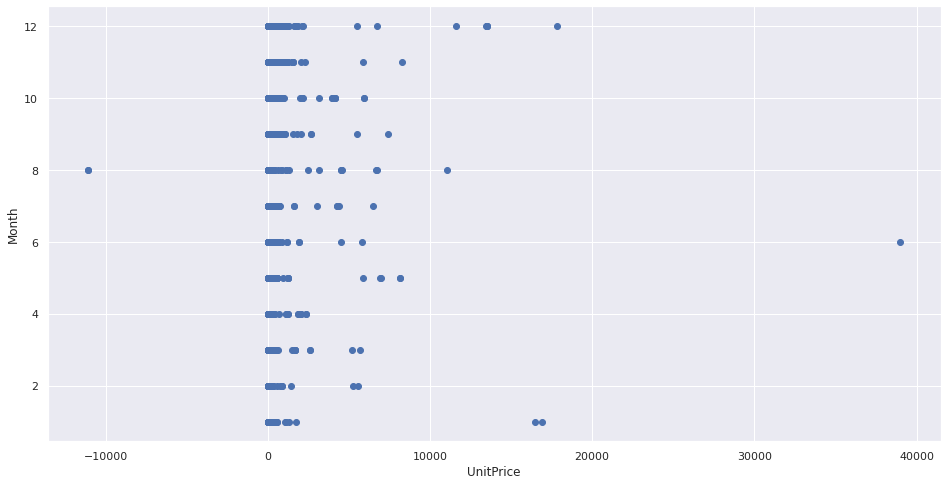

In [32]:
# Adjust the figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Scatter plot using two columns from your dataset, e.g., 'InvoiceDate' and 'Quantity'
# Replace 'Column1' and 'Column2' with the actual column names from your dataset
ax.scatter(df['UnitPrice'], df['Month'])  # You can replace these with any relevant columns

# Setting up labels for x and y axes
ax.set_xlabel('UnitPrice')  # Label for the X-axis, replace with the appropriate description
ax.set_ylabel('Month')  # Label for the Y-axis, replace with the appropriate description

# Display the plot
plt.show()

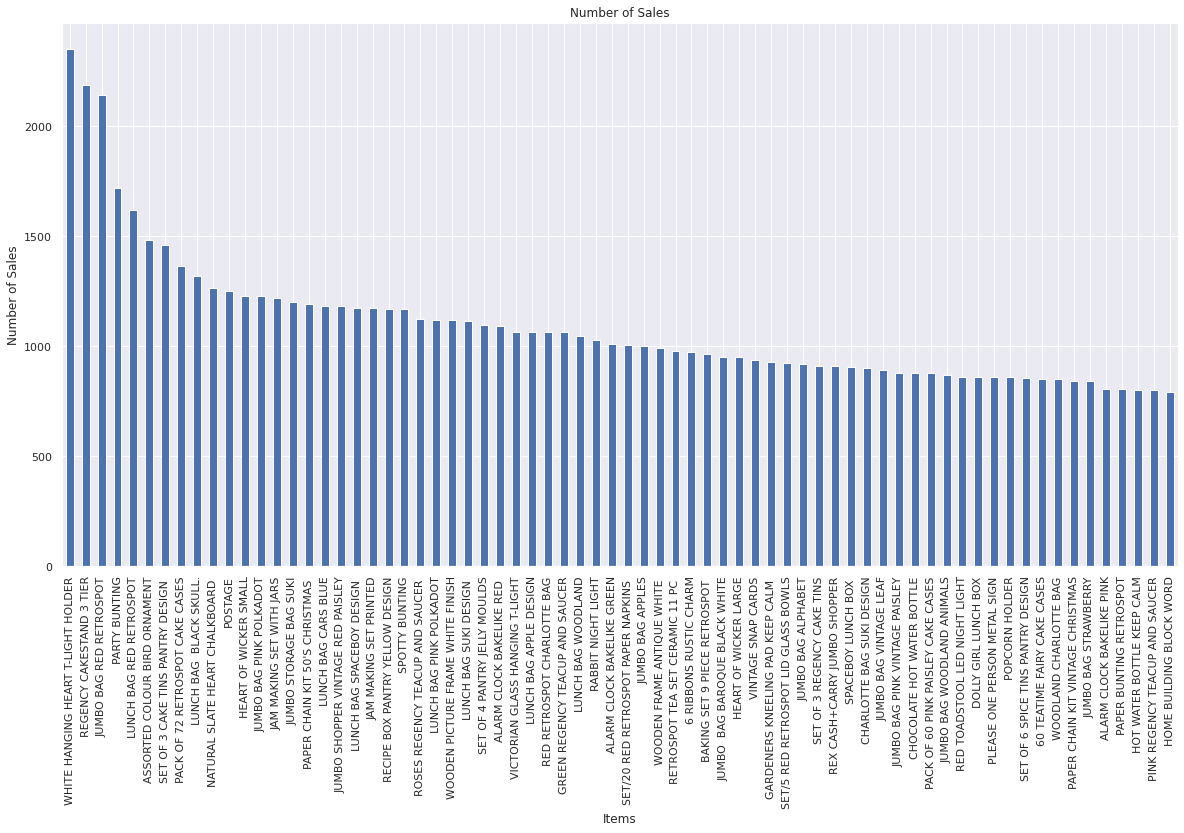

In [51]:
df.Description.value_counts().nlargest(70).plot(kind='bar', figsize=(20,10))
plt.title("Number of Sales")
plt.ylabel('Number of Sales')
plt.xlabel('Items');

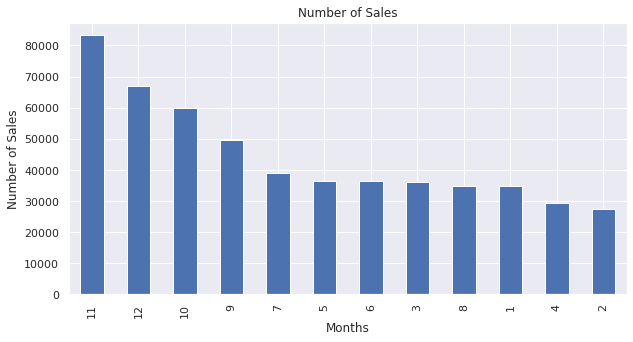

In [42]:
df.Month.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Sales")
plt.ylabel('Number of Sales')
plt.xlabel('Months');

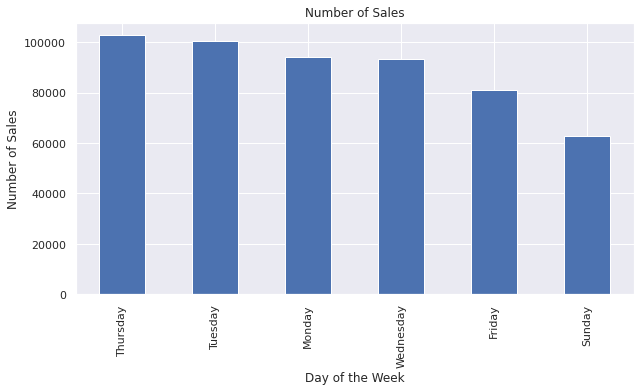

In [43]:
# Plot the number of invoices per day of the week
df['DayOfWeek'].value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("Number of Sales")
plt.ylabel('Number of Sales')
plt.xlabel('Day of the Week')
plt.grid(True)
plt.show()

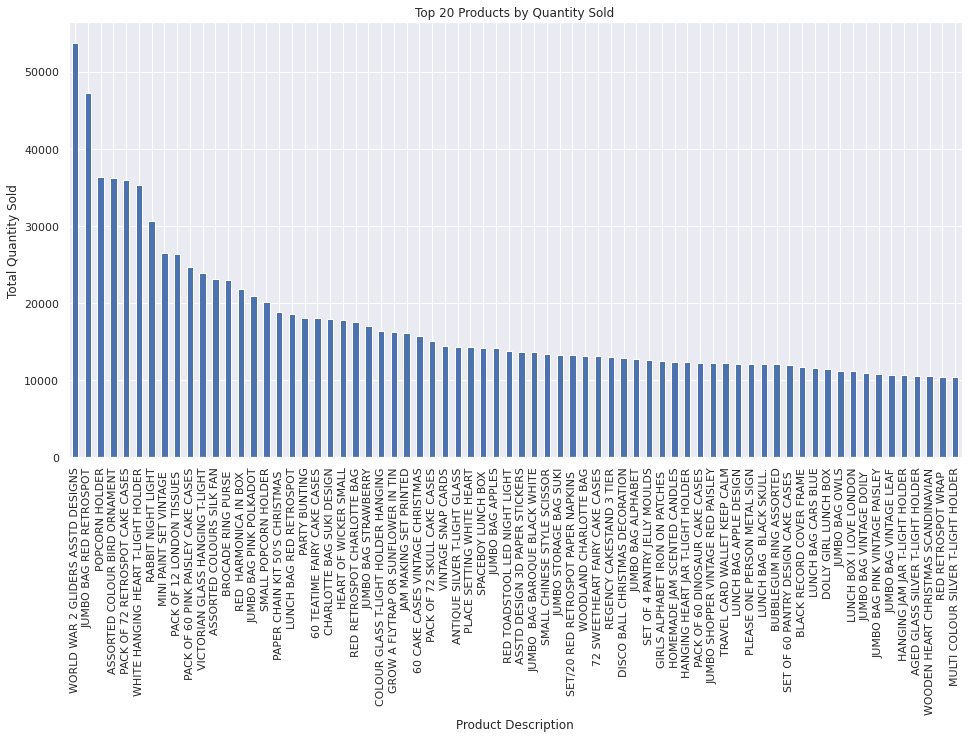

In [49]:
# Aggregate the total quantity for each product description
description_quantity = df.groupby('Description')['Quantity'].sum()

# Sort values to make the plot more readable
description_quantity = description_quantity.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(16,8))
description_quantity[:70].plot(kind='bar')  # Display top 70 products for better readability

# Set labels
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 20 Products by Quantity Sold')

# Show the plot
plt.xticks(rotation=90)
plt.show()

,Quantity,UnitPrice,Day,Month,Year
Quantity,1.000000,-0.001261,-0.000215,-0.001029,0.002006
UnitPrice,-0.001261,1.000000,-0.002685,-0.000486,-0.004624
Day,-0.000215,-0.002685,1.000000,-0.118304,0.163030
Month,-0.001029,-0.000486,-0.118304,1.000000,-0.369152
Year,0.002006,-0.004624,0.163030,-0.369152,1.000000


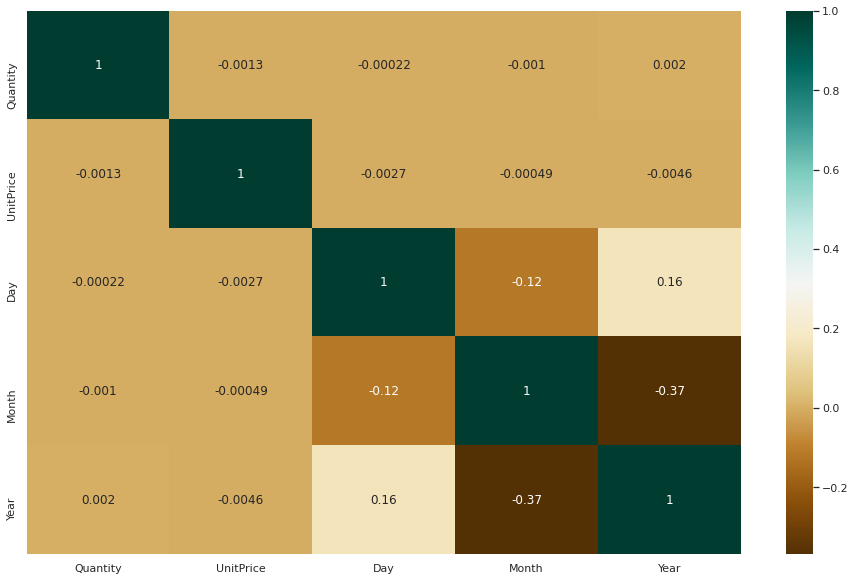

In [53]:
plt.figure(figsize=(16,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c